This notebook contain followings: 

    * preprocessing steps before model building
    
        ** Removing Twitter Handles (@user)
        
        ** Removing Punctuations, Numbers, and Special Characters
        
        ** Removing Short Words
        
        ** Tokenization
        
        ** Stemming
        
    * Visualization of most frequent words for both classes
    
    * Feature creation
        
        ** Bag of words
        
        ** TF*IDF
        
    * model building
        
            ** logistic regression with both sets of features
                F1 score with TF*IDF worked better than bag of words
      

    * Handling unbalanced classes
    
        ** Logistic regression with different sampling techniques
            
            *** Undersampling high frequent class

            *** Oversampling low frequent class

                **** SMOTE
                **** ADASYN
                
        ** Algorithmic Approaches
                
                *** Logistic regression with class_weight="balanced"
        

In [ ]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_recall_curve,auc,roc_auc_score,\
roc_curve,recall_score,classification_report ,f1_score,precision_score

from imblearn.over_sampling import SMOTE, RandomOverSampler,ADASYN
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek
from imblearn.ensemble import BalanceCascade

from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,GridSearchCV
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold

%matplotlib inline

In [2]:
train  = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
train.shape

(7920, 3)

In [5]:
train.tail()

,id,label,tweet
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...
7919,7920,0,Apple Barcelona!!! #Apple #Store #BCN #Barcelo...


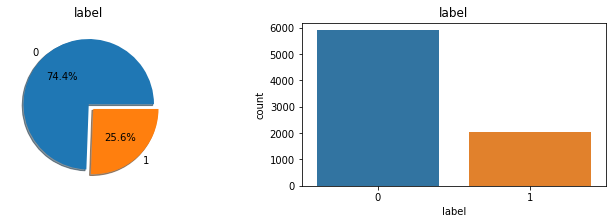

In [27]:
f,ax=plt.subplots(1,2,figsize=(12,3))
train['label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('label')
ax[0].set_ylabel('')
sns.countplot('label',data=train,ax=ax[1])
ax[1].set_title('label')
plt.show()

In [6]:
combi = train.append(test, ignore_index=True)

/home/bhbhan/.conda/envs/newron_clone/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

## PreProcessing Data

### A) Removing Twitter Handles (@user)

In [8]:
# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [9]:
combi.head(20)

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...
5,6,1.0,iPhone software update fucked up my phone big ...,iPhone software update fucked up my phone big ...
6,7,0.0,Happy for us .. #instapic #instadaily #us #son...,Happy for us .. #instapic #instadaily #us #son...
7,8,0.0,New Type C charger cable #UK http://www.ebay.c...,New Type C charger cable #UK http://www.ebay.c...
8,9,0.0,Bout to go shopping again listening to music #...,Bout to go shopping again listening to music #...
9,10,0.0,Photo: #fun #selfie #pool #water #sony #camera...,Photo: #fun #selfie #pool #water #sony #camera...


### B) Removing Punctuations, Numbers, and Special Characters

In [10]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [11]:
combi.head(20)

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https goo gl h ...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...,We love this Would you go #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...,I m wired I know I m George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple won t even talk to...
5,6,1.0,iPhone software update fucked up my phone big ...,iPhone software update fucked up my phone big ...
6,7,0.0,Happy for us .. #instapic #instadaily #us #son...,Happy for us #instapic #instadaily #us #son...
7,8,0.0,New Type C charger cable #UK http://www.ebay.c...,New Type C charger cable #UK http www ebay c...
8,9,0.0,Bout to go shopping again listening to music #...,Bout to go shopping again listening to music #...
9,10,0.0,Photo: #fun #selfie #pool #water #sony #camera...,Photo #fun #selfie #pool #water #sony #camera...


### C) Removing Short Words

In [12]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [13]:
combi.head(20)

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https MfQV #andro...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Finally transparant silicon case Thanks uncle ...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love this Would #talk #makememories #unplug #r...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wired know George made that #iphone #cute #dav...
4,5,1.0,What amazing service! Apple won't even talk to...,What amazing service Apple even talk about que...
5,6,1.0,iPhone software update fucked up my phone big ...,iPhone software update fucked phone time Stupi...
6,7,0.0,Happy for us .. #instapic #instadaily #us #son...,Happy #instapic #instadaily #sony #xperia #xpe...
7,8,0.0,New Type C charger cable #UK http://www.ebay.c...,Type charger cable http ebay #bay #Amazon #ets...
8,9,0.0,Bout to go shopping again listening to music #...,Bout shopping again listening music #iphone #j...
9,10,0.0,Photo: #fun #selfie #pool #water #sony #camera...,Photo #fun #selfie #pool #water #sony #camera ...


### D) Tokenization

In [14]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head(20)

0     [#fingerprint, #Pregnancy, Test, https, MfQV, ...
1     [Finally, transparant, silicon, case, Thanks, ...
2     [love, this, Would, #talk, #makememories, #unp...
3     [wired, know, George, made, that, #iphone, #cu...
4     [What, amazing, service, Apple, even, talk, ab...
5     [iPhone, software, update, fucked, phone, time...
6     [Happy, #instapic, #instadaily, #sony, #xperia...
7     [Type, charger, cable, http, ebay, #bay, #Amaz...
8     [Bout, shopping, again, listening, music, #iph...
9     [Photo, #fun, #selfie, #pool, #water, #sony, #...
10    [#apple, when, make, ipod, dont, make, color, ...
11    [heavy, machinery, does, what, need, really, d...
12    [Contemplating, giving, iPhone, bandwagon, sim...
13    [just, made, another, crazy, purchase, theory,...
14    [battery, painful, charge, overnight, lunchtim...
15    [From, #DeepEllum, towards, #downtown, #Dallas...
16    [Like, Share, want, this, Phone, Case, Iphone,...
17    [crazy, #iphonesia, #iphone, #instagood, #

### E) Stemming

In [15]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head(20)

0     [#fingerprint, #pregnanc, test, http, mfqv, #a...
1     [final, transpar, silicon, case, thank, uncl, ...
2     [love, thi, would, #talk, #makememori, #unplug...
3     [wire, know, georg, made, that, #iphon, #cute,...
4     [what, amaz, servic, appl, even, talk, about, ...
5     [iphon, softwar, updat, fuck, phone, time, stu...
6     [happi, #instap, #instadaili, #soni, #xperia, ...
7     [type, charger, cabl, http, ebay, #bay, #amazo...
8     [bout, shop, again, listen, music, #iphon, #ju...
9     [photo, #fun, #selfi, #pool, #water, #soni, #c...
10    [#appl, when, make, ipod, dont, make, color, i...
11    [heavi, machineri, doe, what, need, realli, dr...
12    [contempl, give, iphon, bandwagon, simpli, bec...
13    [just, made, anoth, crazi, purchas, theori, wo...
14    [batteri, pain, charg, overnight, lunchtim, ba...
15    [from, #deepellum, toward, #downtown, #dalla, ...
16    [like, share, want, thi, phone, case, iphon, #...
17    [crazi, #iphonesia, #iphon, #instagood, #i

In [16]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

In [17]:
combi.head(20)

,id,label,tweet,tidy_tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #pregnanc test http mfqv #android...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,final transpar silicon case thank uncl #yay #s...
2,3,0.0,We love this! Would you go? #talk #makememorie...,love thi would #talk #makememori #unplug #rela...
3,4,0.0,I'm wired I know I'm George I was made that wa...,wire know georg made that #iphon #cute #davent...
4,5,1.0,What amazing service! Apple won't even talk to...,what amaz servic appl even talk about question...
5,6,1.0,iPhone software update fucked up my phone big ...,iphon softwar updat fuck phone time stupid iphon
6,7,0.0,Happy for us .. #instapic #instadaily #us #son...,happi #instap #instadaili #soni #xperia #xperi...
7,8,0.0,New Type C charger cable #UK http://www.ebay.c...,type charger cabl http ebay #bay #amazon #etsi...
8,9,0.0,Bout to go shopping again listening to music #...,bout shop again listen music #iphon #justm #mu...
9,10,0.0,Photo: #fun #selfie #pool #water #sony #camera...,photo #fun #selfi #pool #water #soni #camera #...


## Story Generation and Visualization from Tweets

### A) Understanding the common words used in the tweets: WordCloud

In [18]:
from wordcloud import WordCloud

In [19]:
all_words = ' '.join([text for text in combi['tidy_tweet']])

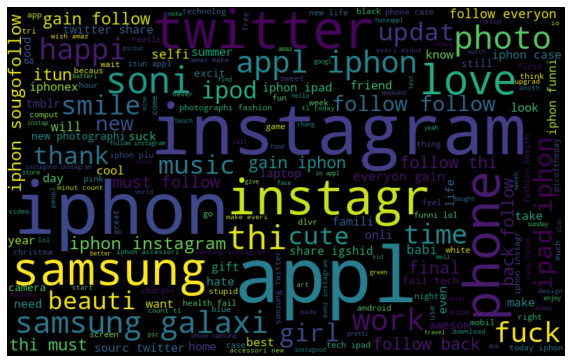

In [20]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### B) Words in non racist/sexist tweets

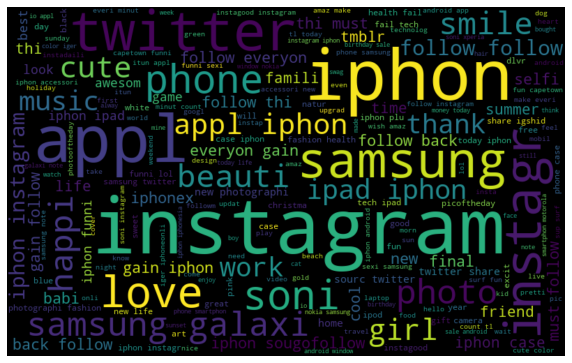

In [21]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### C) Racist/Sexist Tweets

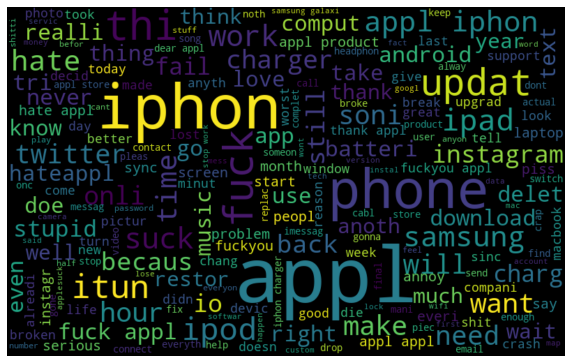

In [22]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### D) Understanding the impact of Hashtags on tweets sentiment

In [23]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [24]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

#### Non-Racist/Sexist Tweets

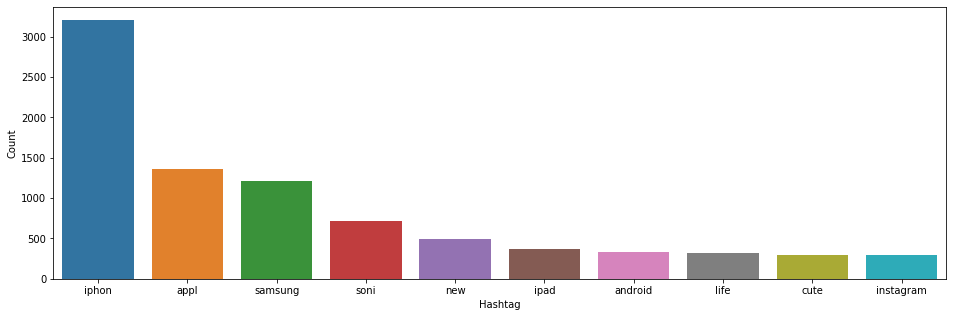

In [25]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

#### Racist/Sexist Tweets

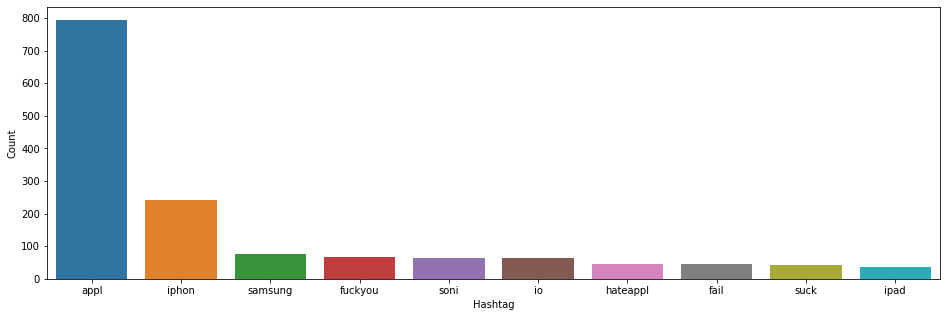

In [26]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Extracting Features from Cleaned Tweets

### Bag-of-Words Features

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

### TF-IDF Features

Let’s have a look at the important terms related to TF-IDF:

TF = (Number of times term t appears in a document)/(Number of terms in the document)

IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.

TF-IDF = TF*IDF

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

## Model Building: Sentiment Analysis

### Building model using Bag-of-Words features

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [43]:
train_bow = bow[:7920,:]
test_bow = bow[7920:,:]

In [44]:
# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

In [45]:
lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

/home/bhbhan/.conda/envs/newron_clone/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set

In [47]:
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int) # calculating f1 score

0.8061366806136679

In [48]:
print("__"*50,"\n")
print('The accuracy of the LR Regression is',metrics.accuracy_score(yvalid,prediction_int))
print("__"*50,"\n")
print('The F1 score of the LR Regression is',metrics.f1_score(yvalid,prediction_int,average='weighted'))
print("__"*50,"\n")
print(classification_report(yvalid,prediction_int))
print("__"*50)

____________________________________________________________________________________________________ 

The accuracy of the LR Regression is 0.882996632996633
____________________________________________________________________________________________________ 

The F1 score of the LR Regression is 0.8865176434734896
____________________________________________________________________________________________________ 

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1735
           1       0.73      0.90      0.81       641

   micro avg       0.88      0.88      0.88      2376
   macro avg       0.84      0.89      0.86      2376
weighted avg       0.90      0.88      0.89      2376

____________________________________________________________________________________________________


In [57]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

### B) Building model using TF-IDF features

In [61]:
lreg = LogisticRegression()

In [62]:
train_tfidf = tfidf[:7920,:]
test_tfidf = tfidf[7920:,:]

#xtrain_tfidf = train_tfidf[ytrain.index]
#xvalid_tfidf = train_tfidf[yvalid.index]

# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain_tfidf, yvalid_tfidf = train_test_split(train_tfidf, train['label'], random_state=42, test_size=0.3)

lreg.fit(xtrain_tfidf, ytrain_tfidf)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid_tfidf, prediction_int)

/home/bhbhan/.conda/envs/newron_clone/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.817234190410007

In [64]:
print("__"*50,"\n")
print('The accuracy of the LR Regression is',metrics.accuracy_score(yvalid_tfidf,prediction_int))
print("__"*50,"\n")
print('The F1 score of the LR Regression is',metrics.f1_score(yvalid_tfidf,prediction_int,average='weighted'))
print("__"*50,"\n")
print(classification_report(yvalid_tfidf,prediction_int))
print("__"*50)

____________________________________________________________________________________________________ 

The accuracy of the LR Regression is 0.8893097643097643
____________________________________________________________________________________________________ 

The F1 score of the LR Regression is 0.8927253589678573
____________________________________________________________________________________________________ 

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1735
           1       0.74      0.92      0.82       641

   micro avg       0.89      0.89      0.89      2376
   macro avg       0.85      0.90      0.87      2376
weighted avg       0.90      0.89      0.89      2376

____________________________________________________________________________________________________


In [38]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_tfidf.csv', index=False) # writing data to a CSV file

## Let's use TF*IDF feature now onward

## Handling Unbalanced Class

In [83]:
def resample_data(clf, x, y, cv, sampler):
    '''
        This function computes the cross-validation score of a given 
        classifier using a choice of sampling function to mitigate 
        the class imbalance, and stratified k-fold sampling.
        
        The first five arguments are the same as 
        sklearn.model_selection.cross_val_score.
        
        - clf.predict_proba(x) returns class label probabilities
        - clf.fit(x,y) trains the model
        
        - x = data
        
        - y = labels
        
        - cv = the number of folds in the cross validation
        
        - scoring(classifier, x, y) returns a float
        
        The last argument is a choice of random sampler: an object 
        similar to the sampler objects available from the python 
        package imbalanced-learn. In particular, this 
        object needs to have the method:
        
        sampler.fit_sample(x,y)
        
    '''
    
    cv_score = 0.
    train_score = 0.
    test_score = 0.
    
    # stratified k-fold creates folds with the same ratio of positive 
    # and negative samples as the entire dataset.
    
    skf = StratifiedKFold(n_splits=cv, random_state=0, shuffle=False)
    
    for train_idx, test_idx in skf.split(x,y):
        #print(train_idx,test_idx)
        xfold_train_sampled, yfold_train_sampled = sampler.fit_sample(x[train_idx],y[train_idx])
        clf.fit(xfold_train_sampled, yfold_train_sampled)
        
        prediction1=clf.predict(x[test_idx])
        
        cv_score += metrics.f1_score(y[test_idx],prediction1)
        
    return cv_score/cv,clf
        

In [84]:
lreg = LogisticRegression()

In [85]:
# Logistic regression score with Random Over-sampling
print("Random over-sampling")
score,clf = resample_data(lreg, train_tfidf, train['label'], 5, RandomOverSampler())
print("Cross-validated F1 score: %.2f"%score)

# Logistic regression score with SMOTE
print("SMOTE over-sampling")
score,clf = resample_data(lreg,train_tfidf, train['label'], 5, SMOTE())
print("Cross-validated F1 score: %.2f"%score)

# Logistic regression score with a
print("ADASYN over-sampling")
score,clf = resample_data(lreg, train_tfidf, train['label'], 5, ADASYN())
print("Cross-validated F1 score: %.2f"%score)

# Logistic regression score with Random Under Sampling
print("Random under-sampling")
score,clf = resample_data(lreg, train_tfidf, train['label'], 5, RandomUnderSampler())
print("Cross-validated F1 score: %.2f"%score)

Random over-sampling


/home/bhbhan/.conda/envs/newron_clone/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross-validated F1 score: 0.80
SMOTE over-sampling


/home/bhbhan/.conda/envs/newron_clone/lib/python3.6/site-packages/sklearn/neighbors/base.py:452: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.vstack(result)
/home/bhbhan/.conda/envs/newron_clone/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross-validated F1 score: 0.81
ADASYN over-sampling


/home/bhbhan/.conda/envs/newron_clone/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross-validated F1 score: 0.80
Random under-sampling
Cross-validated F1 score: 0.80


/home/bhbhan/.conda/envs/newron_clone/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bhbhan/.conda/envs/newron_clone/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bhbhan/.conda/envs/newron_clone/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bhbhan/.conda/envs/newron_clone/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bhbhan/.conda/envs/newron_clone/lib/python3.6/site-packages/sklearn/linear_mod

### Algorithmic Approaches

In [86]:
lreg = LogisticRegression(class_weight='balanced')

In [87]:
train_tfidf = tfidf[:7920,:]
test_tfidf = tfidf[7920:,:]

#xtrain_tfidf = train_tfidf[ytrain.index]
#xvalid_tfidf = train_tfidf[yvalid.index]

# splitting data into training and validation set
xtrain_tfidf, xvalid_tfidf, ytrain_tfidf, yvalid_tfidf = train_test_split(train_tfidf, train['label'], random_state=42, test_size=0.3)

lreg.fit(xtrain_tfidf, ytrain_tfidf)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid_tfidf, prediction_int)

0.7720174890693317

In [88]:
print("__"*50,"\n")
print('The accuracy of the LR Regression is',metrics.accuracy_score(yvalid,prediction_int))
print("__"*50,"\n")
print('The F1 score of the LR Regression is',metrics.f1_score(yvalid,prediction_int,average='weighted'))
print("__"*50,"\n")
print(classification_report(yvalid,prediction_int))
print("__"*50)

____________________________________________________________________________________________________ 

The accuracy of the LR Regression is 0.8463804713804713
____________________________________________________________________________________________________ 

The F1 score of the LR Regression is 0.8539088088470704
____________________________________________________________________________________________________ 

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1735
           1       0.64      0.96      0.77       641

   micro avg       0.85      0.85      0.85      2376
   macro avg       0.81      0.88      0.83      2376
weighted avg       0.89      0.85      0.85      2376

____________________________________________________________________________________________________
